<a href="https://colab.research.google.com/github/shubham-jindal/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Loading Dataset and Importing Modules and Libraries**

In [ ]:
#Impoting Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

##Importing Dataset

In [ ]:
#mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2(Regression)/SeoulBikeData.csv',encoding= 'latin')

## Displaying dataset

In [ ]:
# Taking a look to data
# Display the data of first 5 rows 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Last 5 Rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Shape of the Data
df.shape

(8760, 14)

## Checking number of null values in all columns

In [ ]:
# Check the total null values of different coloumns and sort them in ascending order
df.isnull().sum().sort_values(ascending = False)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no Null values in the Dataset.

In [ ]:
#Checking all the coloums 
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Get the description of the data in the data frame
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# glance of information in the dataset
# dataset consist of 8760 rows and 14 columns
# there are several data types: object, int64, and float64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

##Printing Unique Values

In [ ]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# **Preprocessing the data**

Preprocessing the data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:
1.   Remove duplicate rows
2.   Handling missing values
3.   Convert columns to appropriate datatypes
4.   Adding important columns


**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.*** 

In [ ]:
#check for count of missing values in each column.
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

###Remove duplicate rows

In [ ]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***There are no Duplicate values in this dataset.***

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*






###Rename Columns According to our need

In [ ]:
#Rename the columns name
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

##Breaking down date column

In [ ]:
# Changing the "Date" column into three "year","month","day" column
df['Date'] = df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
#Let's create a new column "weekend_and_weekdays" and delete "Date","day","year" these columns.
df['weekend_and_weekdays']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day','year'],axis=1)

* ***We dropped all these 3 Columns.***
* ***We mainly require which daya are working days and which are weekend or holiday.*** 

In [ ]:
#Let's check our data now.
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekend_and_weekdays
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
df['weekend_and_weekdays'].value_counts()

0    6264
1    2496
Name: weekend_and_weekdays, dtype: int64

###Now we will change the data type of some columns to category column

In [ ]:
#Change the column into catagory column
cols=['Hour','month','weekend_and_weekdays']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekend_and_weekdays   8760 non-null   c

In [ ]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekend_and_weekdays'],
      dtype='object')

# **Exploratory Data Analysis Of The Data Set**

**We will be doing Univariate Analysis, Analysis of Dependent Variable and Analysation of categorical variables**

[Text(0.5, 1.0, 'Count of bikes acording to weekend_and_weekdays ')]

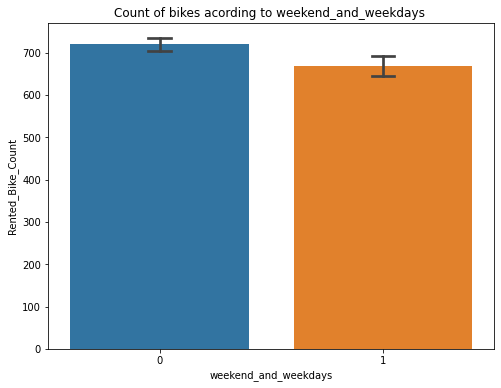

In [ ]:
#Weekend_and_weekdays column comparison
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=df,x='weekend_and_weekdays',y='Rented_Bike_Count',ax=ax,capsize=.1)
ax.set(title='Count of bikes acording to weekend_and_weekdays ')

* ***The number of bikes rented on working days and weekend and weekdays are almost equal.***

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekend_and_weekdays ')]

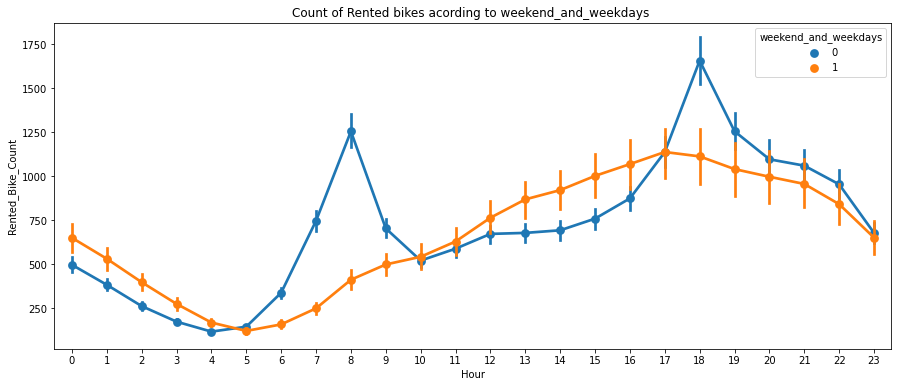

In [ ]:
fig,ax=plt.subplots(figsize=(15,6))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue ='weekend_and_weekdays',ax=ax)
ax.set(title='Count of Rented bikes acording to weekend_and_weekdays ')

* ***After analysing above graph we can say that the Blue line which is representing working days is getting more demand as compared to orange line which is for weekend or week days.***
* ***From 7am to 9 am and 5 pm to 9 pm demand is higher because these are the peek office hours.***
* ***On Weekend and weekdays demand is very low in morning but it increase in the evening.***

## **Vizualisation of Rented bikes according to hour.**

[Text(0.5, 1.0, 'Number of Rented bikes acording to Hour ')]

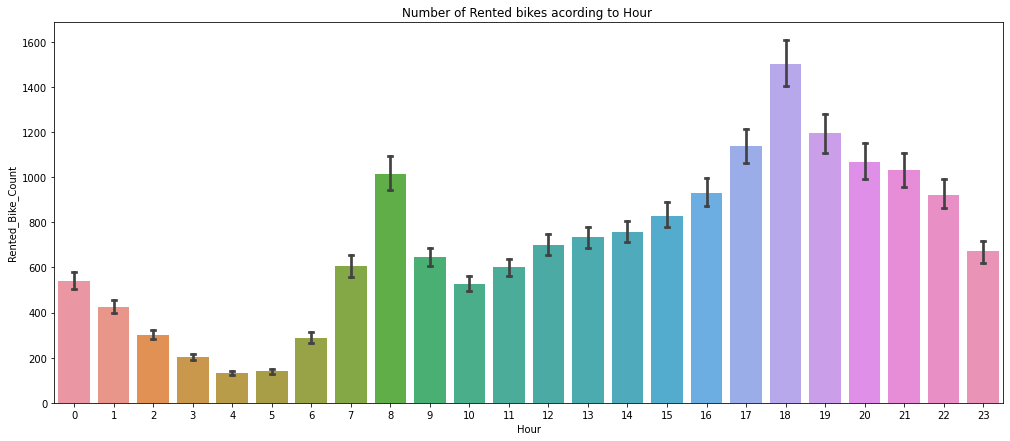

In [ ]:
fig,ax=plt.subplots(figsize=(17,7))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.1)
ax.set(title='Number of Rented bikes acording to Hour ')

* ***Number of bikes rented in the morning are less as compared to the bikes rented in the evening.***
* ***Maximum no. of bikes are rented at 6Pm.***
 

[Text(0.5, 1.0, 'Number of Rented bikes in each Season ')]

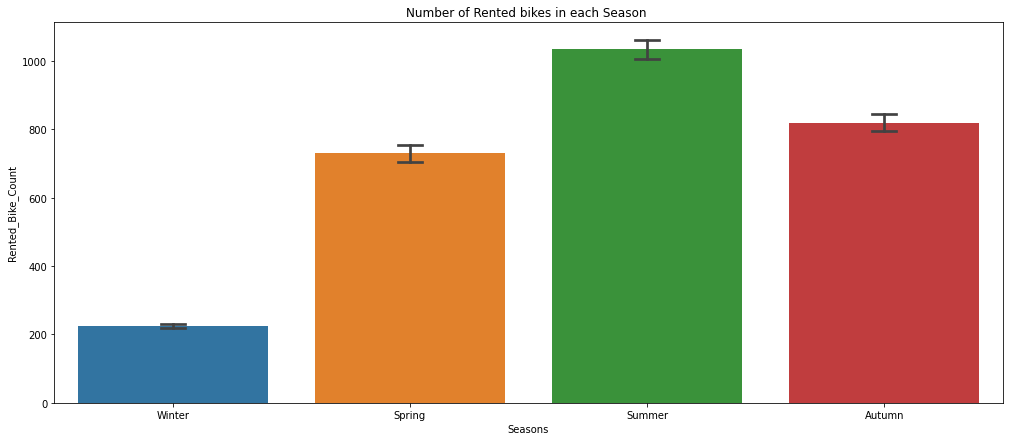

In [ ]:
fig,ax=plt.subplots(figsize=(17,7))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.1)
ax.set(title='Number of Rented bikes in each Season ')

* ***In summer season maximum number of bikes are rented.***

[Text(0.5, 1.0, 'Number of Rented bikes according to every month ')]

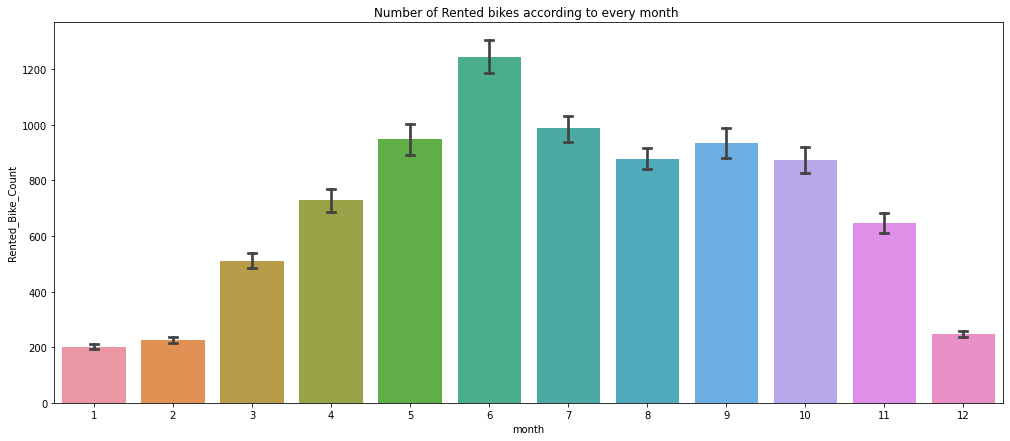

In [ ]:
fig,ax=plt.subplots(figsize=(17,7))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.1)
ax.set(title='Number of Rented bikes according to every month ')

* ***From may to october month maximum number of bikes are rented.***

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

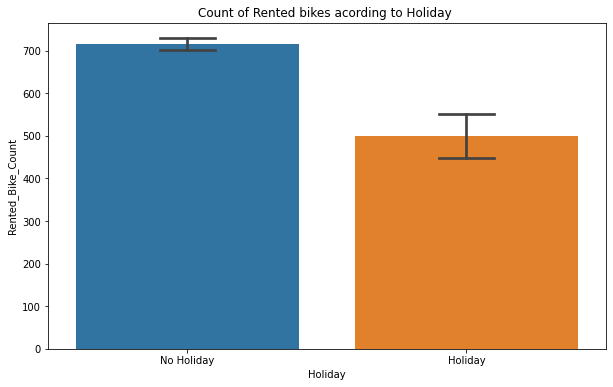

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

* ***Number of bikes rented are more when there is no holiday.***

#Let's analyze all Numerical Variables.

In [ ]:
num_columns=list(df.select_dtypes(['int64','float64']).columns)
num_variables=pd.Index(num_columns)
num_variables

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

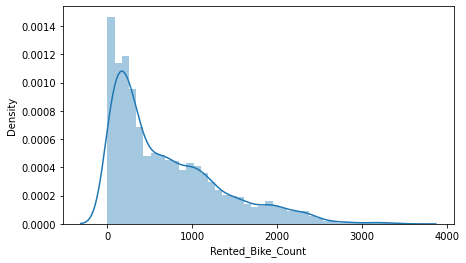

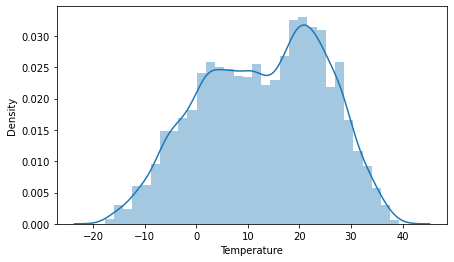

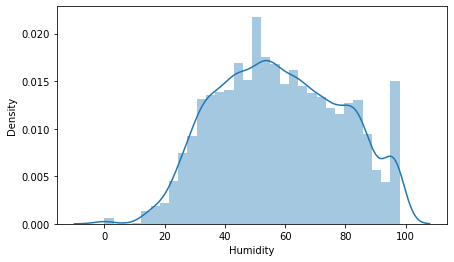

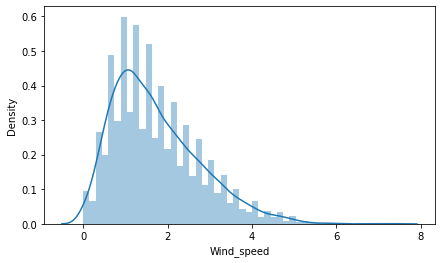

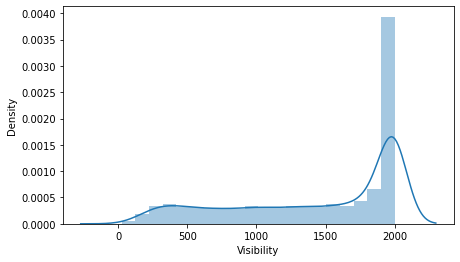

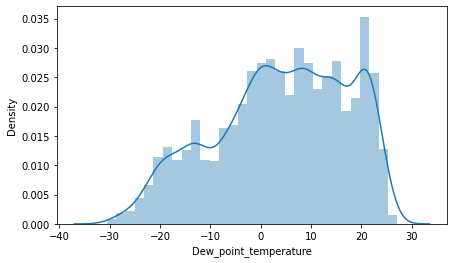

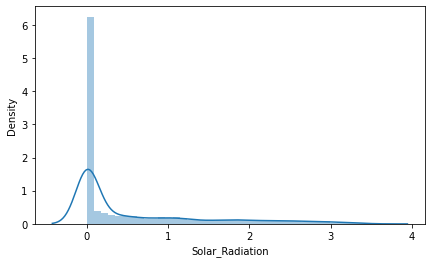

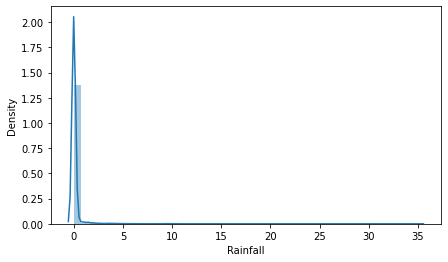

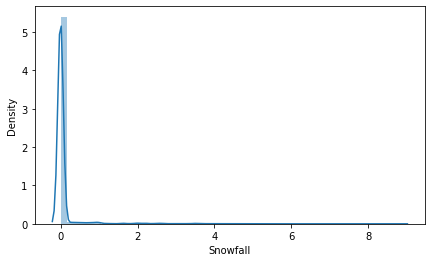

In [ ]:
#Let's Plot all the numerical variables
for col in num_variables:
  plt.figure(figsize=(7,4))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

##Now we will compare all numerical variables with no. of bikes rented.

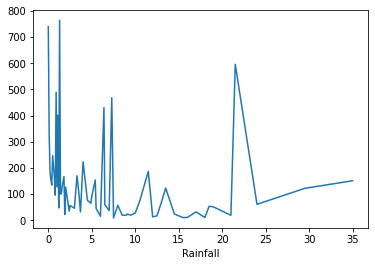

In [ ]:
#Comparison between rainfall and rented bikes.
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

* ***From above graph we can see that rainfall does not affect the no. of bikes rented even in heavy rainfall the no. of rented bikes are more.***

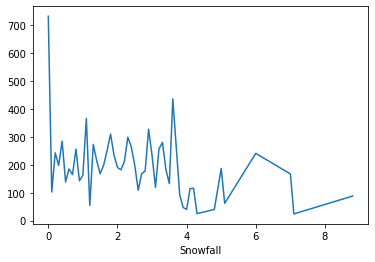

In [ ]:
#Comparison between snowfall and rented bikes.
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

* ***Snowfall does not have much effect on the no. of bikes rented but no. of bikes rented slightly decreases when the snowfall is very high.***

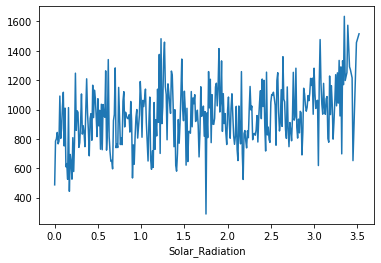

In [ ]:
#Comparison between Solar Radiation and rented bikes.
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

* ***Solar Radiation does not have any effect on the no. of bikes rented.***

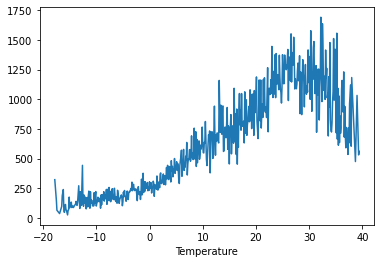

In [ ]:
#Comparison between Temprature and rented bikes.
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

* ***When the Temprature is very less or in minus the no. of bikes rented are very less but as the temperature increase the no. of bikes rented also increases and after the temprature increases from 35 no. of bikes rented again starts decreasing.***

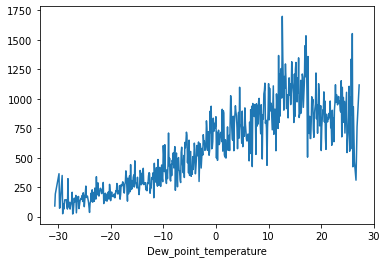

In [ ]:
#Comparison between Dew Point Temprature and rented bikes.
df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

* ***Dew point temperature have same pattern as the Temperature.***

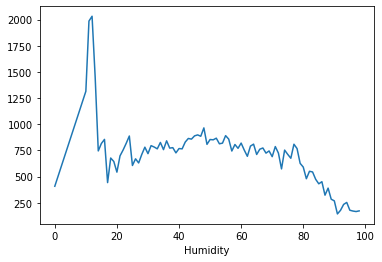

In [ ]:
#Comparison between Humidity and rented bikes.
df.groupby('Humidity').mean()['Rented_Bike_Count'].plot()

* ***When the humidity is 10 no. of bikes rented are maximum byt when the humidity increases from 80 the no. of bikes rented starts decreasing.***

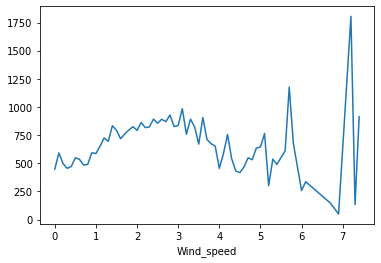

In [ ]:
#Comparison between Wind Speed and rented bikes.
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

* ***When the speed of the wind is 0 to 6 the no. of bikes rented are approximately same but after speed of 6 the no. of bikes rented decreases drastically and again increases drastically after the wind speed of 7.***

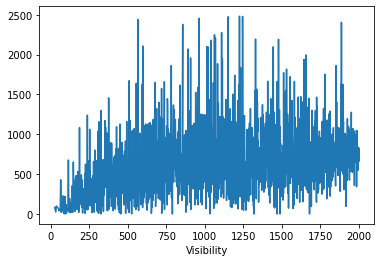

In [ ]:
#Comparison between Visibility and rented bikes.
df.groupby('Visibility').mean()['Rented_Bike_Count'].plot()

* ***After observing the above graph we can say that the visibility does not have any effect on the number of bikes rented.***

#Regression Plot or Graph

* ***This plot will show us the linear relationship between 2 variables. We will try to understand the relationship between rented bikes and all numerical variables.***

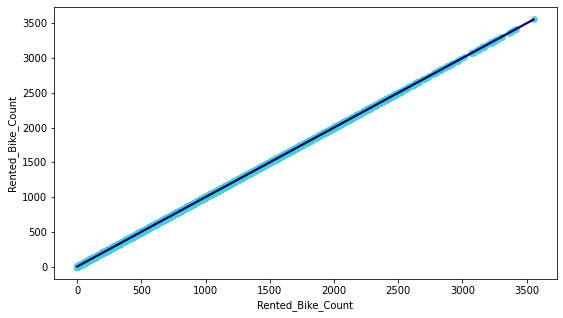

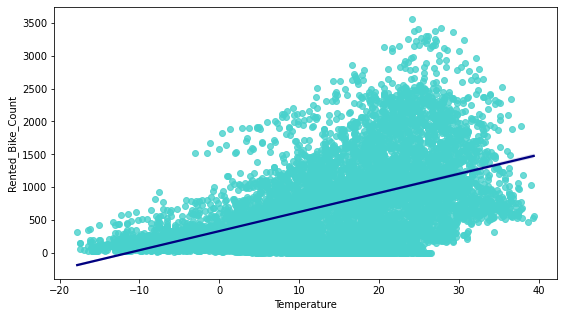

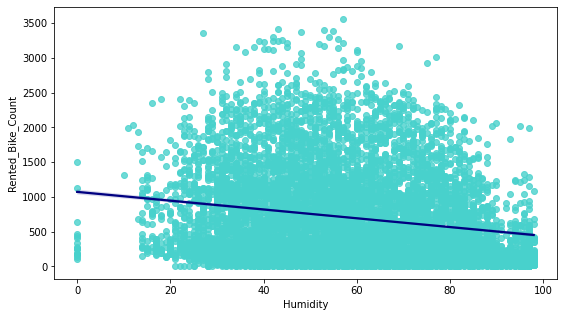

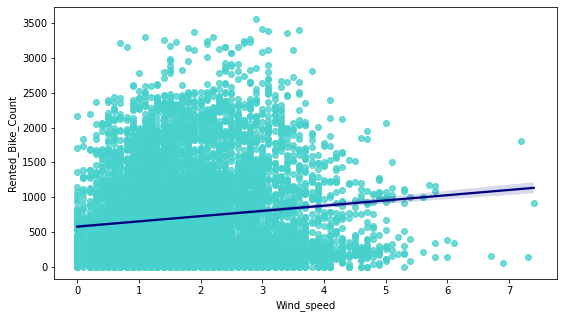

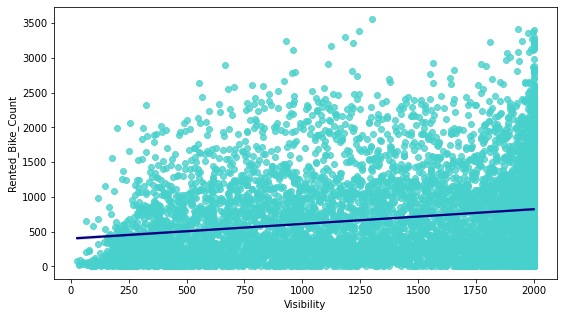

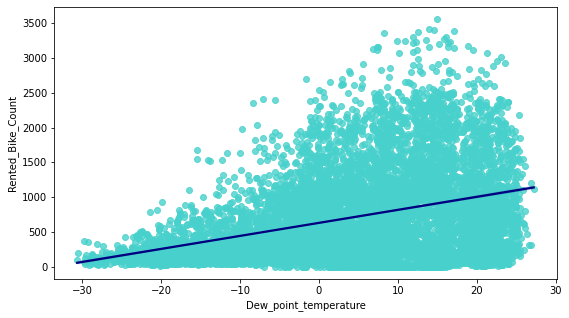

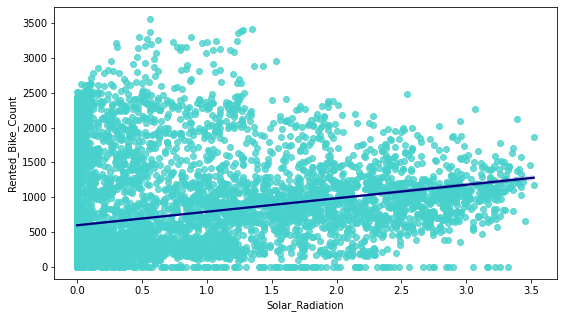

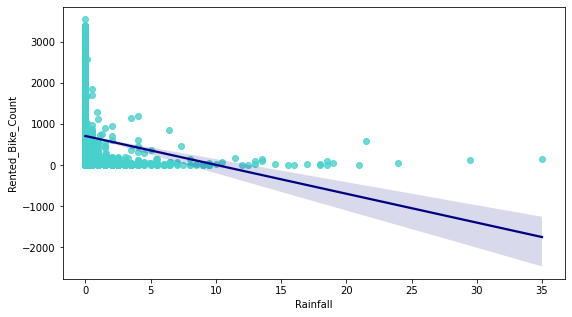

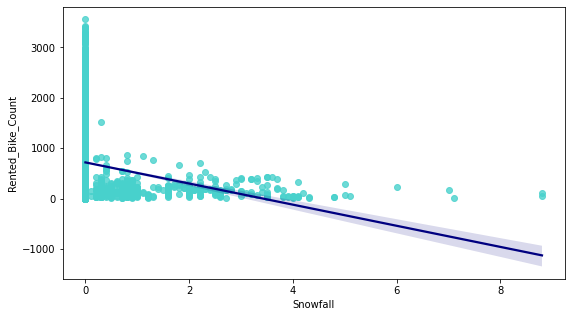

In [ ]:
#Showing the regression plot for all the numerical features
for col in num_variables:
  fig,ax=plt.subplots(figsize=(9,5))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'mediumturquoise'}, line_kws={"color": "navy"})

#Distribution Plot

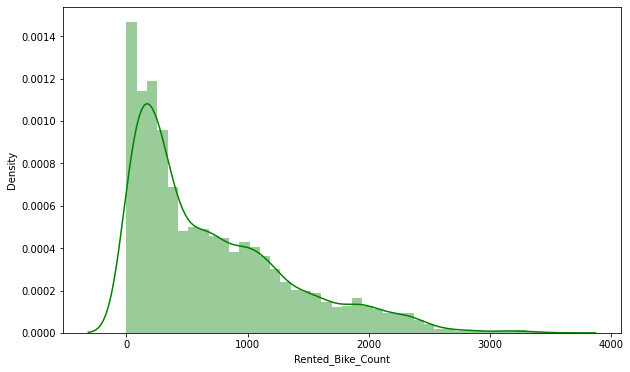

In [ ]:
#Let,s see the distribution plot for the Rented Bikes Column.
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="g")
plt.show()

* ***From the above graph we can say that the distribution is Right Skewed.***
* ***But in the linear regression we have the assumption that the distribution is normal so we need to normalise this distribution.***

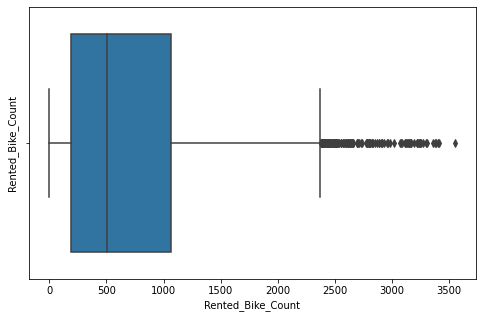

In [ ]:
#Let,s check for the outliers
plt.figure(figsize=(8,5))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

* ***There are a lot of outliers in this column so we will remove these outliers and then again check the distribution.***

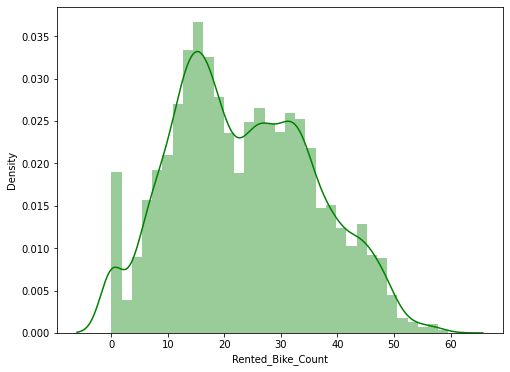

In [ ]:
#Applying square root to Rented Bike Count
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="g")

plt.show()

* ***After applying square root to this column the distribution of this columns has become almost normal and outlier are also removed from the column.***

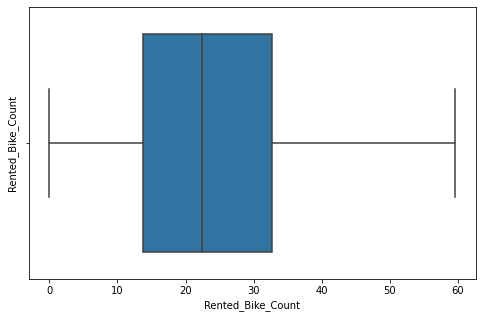

In [ ]:
#Let,s check agin for the outliers
plt.figure(figsize=(8,5))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

* ***There are no outliers present in Rented Bikes Column.***

#Correlation between different Variables

In [ ]:
import statsmodels.api as sm
X = df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = df['Rented_Bike_Count']

df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekend_and_weekdays
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#adding a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
#Let,s fit an ols model
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Sun, 25 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:24:55   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*  **The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity.***
**R sqauare and Adj Square are almost same.***
*  **P value of dew point temp and visibility are very high and they are not significant.**

In [ ]:
#Let,s chcek correlation again
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


* ***After observing the model and correlation we can say that temperature and dew point temperature are highle correlated to each other so we need to drop one column from these two.***
* ***As the p value for dew point temperature is higher so we can drop this column.***

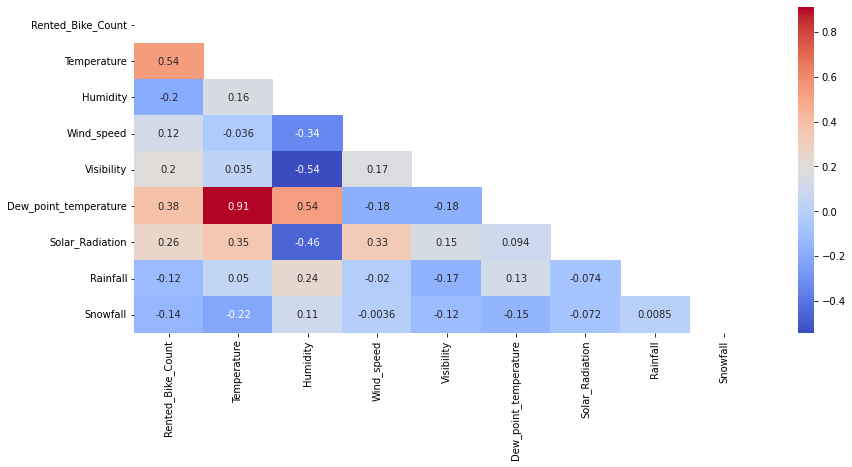

In [ ]:
#Let.s Plot Correlation Heatmap
plt.figure(figsize=(14,6))
heatmap=df.corr()
mask = np.triu(np.ones_like(heatmap, dtype=bool))
sns.heatmap((heatmap),mask=mask, annot=True,cmap='coolwarm')

***Variables which are most poitively correlated to rented bikes are***
* Solar radiation
* Dew point temperature
* Temperature

***Variables which are least or negatively correlayed to rented bikes are***
* Rainfall
* Snowfall
* Humidity

###It is clear from the heatmap that the temperature and dew point temperature are highly correlated to each other so we can drop one column from them.

In [ ]:
#Let,s drop dew point temperature
df=df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekend_and_weekdays
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
